## **TAREA 2: LOS BUENOS EJEMPLOS SE COPIAN**

**Autor:** Victor Saldivia Vera  
**Asignatura:** Visualización de la Información

Para esta tarea trataremos de reproducir dos visualizaciones del The Economist. Para ello, nos enfocaremos en imitar la paleta de colores que ocuparon, las visualizaciones y las anotaciones que incluyen en los gráficos, además de todos los otros detalles de título, subtítulo, etcétera.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from matplotlib.colors import LinearSegmentedColormap


from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes

#### **CARGANDO EL DATASET**

In [10]:
df = pd.read_csv('./data/01-behavioural-finance.csv', index_col=0)

#### **REORDENANDO LOS PAÍSES**

In [12]:
countries_order = [
    'Fin', 'Nor', 'Swe', 'Den', 'UK', 'Ire', 'NL','Ger', 'Bel', 'Aus', 'Fra', 'Ita', 'Spa', 'Por', 'Gre']

In [13]:
df = df.loc[countries_order, countries_order]

#### **DEFINICIÓN DEL COLORAMP PERSONALIZADO**

In [14]:
# Se crea un gradiente de colores similar al utilizado en la visualización original
colors = ['#f0f0f0', '#efedf5', '#bcbddc', '#9e9ac8', '#756bb1', '#54278f']
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    (0.000, (1.000, 0.357, 0.298)),
    (0.333, (1.000, 1.000, 1.000)),
    (0.666, (0.024, 0.671, 0.820)),
    (1.000, (0.208, 0.349, 0.416))))

#### **FUNCIÓN PARA ROTAR EL GRÁFICO**

In [15]:
# Función para rotar el gráfico
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df.shape[0], 0, df.shape[1]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax


#### **PERSONALIZACIÓN DEL GRÁFICO**

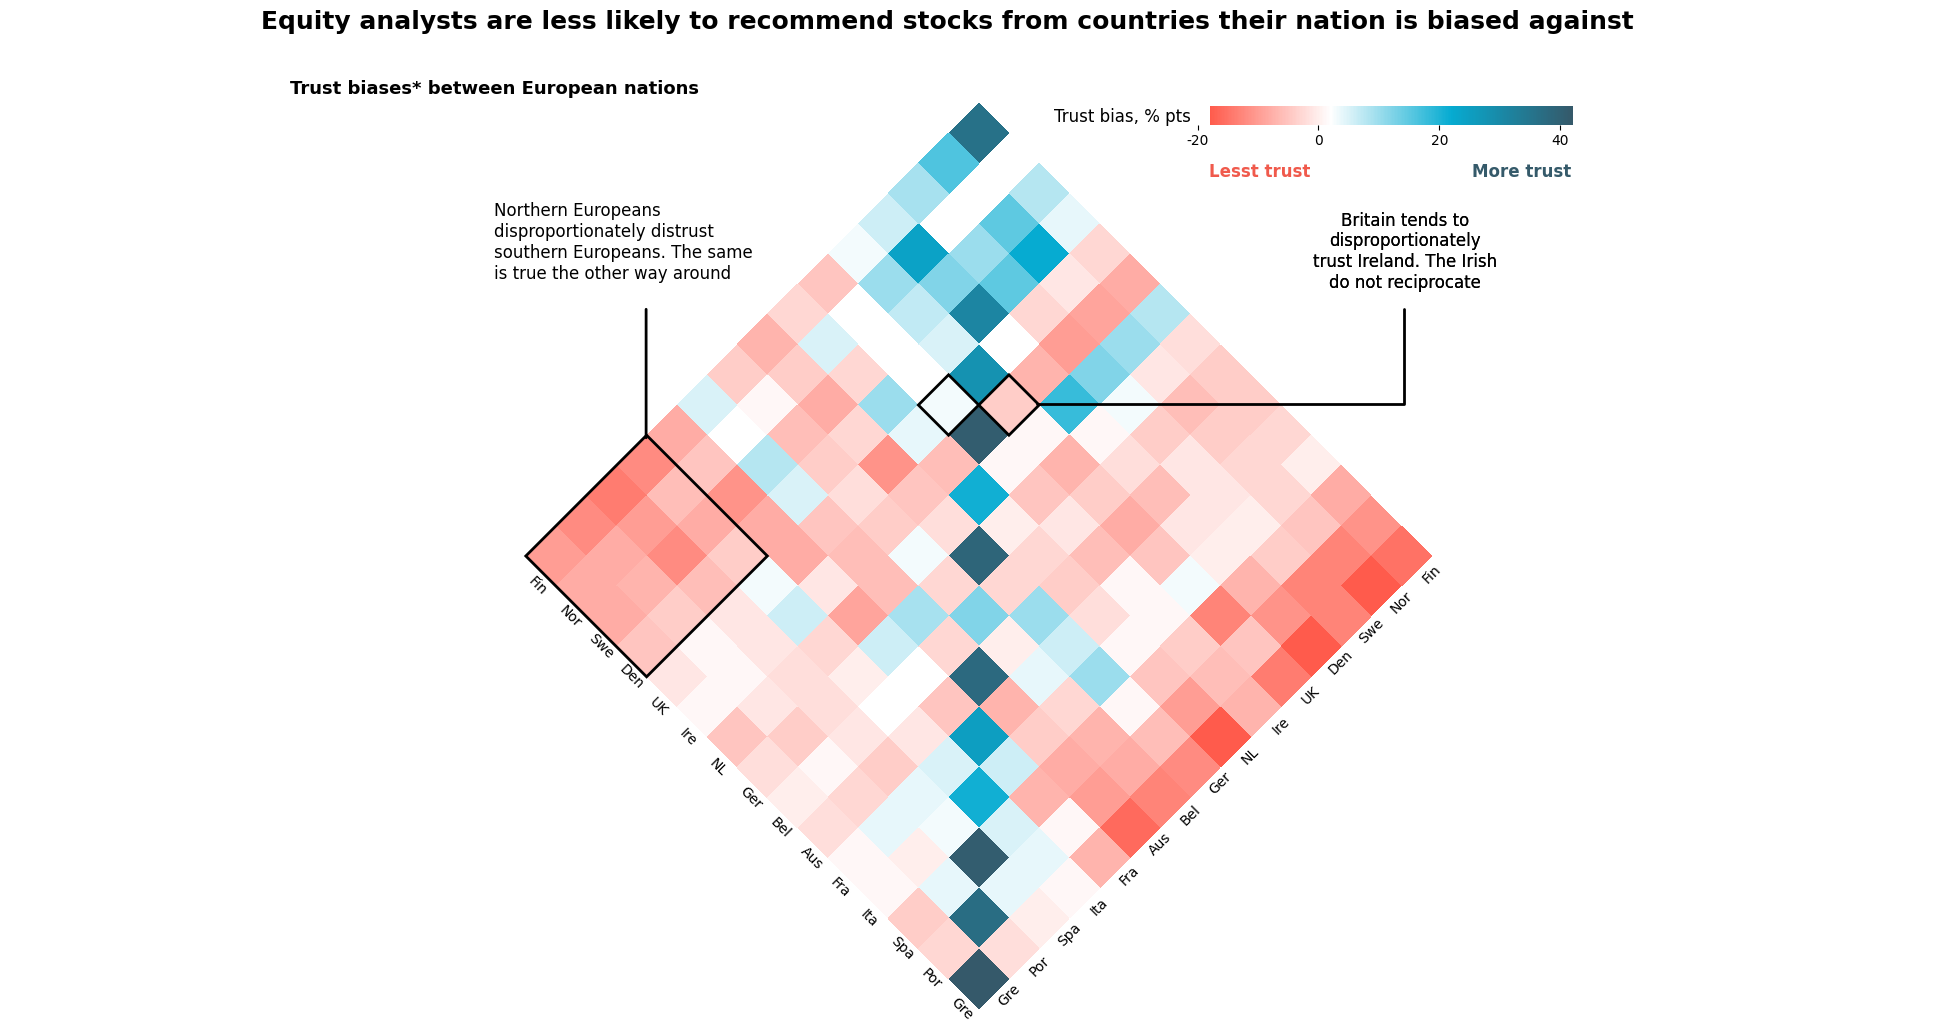

In [192]:
# Figura y el eje rotado
fig, ax = plt.subplots(1, 1, figsize=(25, 12))

# Rotación del gráfico
new_graph = rotate_axes(fig, 111, -135)

# Crear el heatmap en el eje rotado
sns.heatmap(df, cmap=my_gradient, ax=new_graph, cbar=True, annot=False, cbar_kws={'orientation': 'horizontal'}, zorder = 1)

# Ajustando la posición del color bar y las etiquetas
cbar = new_graph.collections[0].colorbar
cbar.ax.set_position([0.6, 0.85, 0.15, 0.02])  

# Configuración del rango del color bar
cbar.set_ticks([-0.2, 0, 0.2, 0.4])
cbar.set_ticklabels(['-20', '0', '20', '40'])

# Configuración de la etiqueta del color bar
cbar.set_label('Trust bias, % pts', fontsize=12)
cbar.ax.xaxis.set_label_coords(-0.2, 0.9)  # Ajustar posición de la etiqueta (x, y)

# Título centrado en la parte superior de la figura
fig.suptitle('Equity analysts are less likely to recommend stocks from countries their nation is biased against', 
             fontsize=18, weight='bold', x=0.5, y=0.95, ha='center')

# Se agrega los textos adicionales
new_graph.text(0.25, 1.0, 'Trust biases* between European nations', fontsize=13, weight='bold', ha='center', transform=ax.transAxes)

new_graph.text(0.25, 0.8, 'Northern Europeans \ndisproportionately distrust\nsouthern Europeans. The same\nis true the other way around', 
         fontsize=12, ha='left', transform=ax.transAxes)

# Dibujar la línea en el lado izquierdo debajo del texto "Northern Europeans..."
new_graph.annotate('', xy=(0.14, 0.625), xytext=(0.14, 0.77),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle="-", color='black', lw=2), zorder=10)

# Dibujar un cuadro alrededor de las casillas de Finlandia, Noruega, Suecia, Dinamarca, y Reino Unido
rect = patches.Rectangle((11, 0.0), 4.0, 4.0, linewidth=2, edgecolor='black', facecolor='none', transform=new_graph.transData, zorder=10)
new_graph.add_patch(rect)

# Dibujar un cuadro alrededor de las casillas de Dinamarca, Suecia, Noruega y Finlandia
rect = patches.Rectangle((11, 0.0), 4.0, 4.0, linewidth=2, edgecolor='black', facecolor='none', transform=new_graph.transData, zorder=10)
new_graph.add_patch(rect)

new_graph.text(0.72, 0.79, 'Britain tends to\ndisproportionately\ntrust Ireland. The Irish\ndo not reciprocate', 
         fontsize=12, ha='center', transform=ax.transAxes, zorder=5)

# Dibujar la línea directamente sobre new_graph en lugar de ax
new_graph.annotate('', xy=(0.56, 0.665), xytext=(0.96, 0.77),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle="-", color='black', lw=2, 
                            connectionstyle="angle,angleA=90,angleB=0,rad=0"), zorder=10)


# Dibujar un cuadro alrededor de las casillas del centro
rect = patches.Rectangle((4.0, 5.0), 1.0, 1.0, linewidth=2, edgecolor='black', facecolor='none', transform=new_graph.transData, zorder=10)
new_graph.add_patch(rect)

# Dibujar un cuadro alrededor de las casillas del centro
rect = patches.Rectangle((5.0, 4.0), 1.0, 1.0, linewidth=2, edgecolor='black', facecolor='none', transform=new_graph.transData, zorder=10)
new_graph.add_patch(rect)


new_graph.text(0.72, 0.79, 'Britain tends to\ndisproportionately\ntrust Ireland. The Irish\ndo not reciprocate', 
         fontsize=12, ha='center', transform=ax.transAxes, zorder=5)

new_graph.text(0.645, 0.91, 'Lesst trust', 
         fontsize=12, ha='center', weight='bold', color='#f05a4c', transform=ax.transAxes)

new_graph.text(0.78, 0.91, 'More trust', 
         fontsize=12, ha='center', weight='bold', color='#355A6A', transform=ax.transAxes)

# Se agregan etiquetas de países a lo largo de los ejes rotados
for i in range(df.shape[0]):
    # Etiquetas en el eje y (vertical)
    new_graph.text(df.shape[0] + 0.5, i + 0.5, df.columns[i], ha='left', va='center', rotation=-45, fontsize=10)
    # Etiquetas en el eje x (horizontal)
    new_graph.text(i + 0.5, df.shape[0] + 0.5, df.columns[i], ha='center', va='bottom', rotation=45, fontsize=10)

# Se remueve los bordes del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Eliminación de las marcas y los números del eje X y eje Y
ax.set_xticks([]) 
ax.set_xticklabels([])  

ax.set_yticks([])  
ax.set_yticklabels([]) 

plt.show()